**Автор: Анна Смелова**

#### <font color='DarkBlue'>Работа выполнена на версии python 3.7.3</font>

#### Версии используемых библиотек:
1. numpy 1.17.2
2. pandas 0.25.0
3. matplotlib 3.1.1
4. seaborn 0.9.0

# Курсовой проект по курсу "Теория вероятностей и математическая статистика"

#### Цель проекта
Исследовать датасет с данными с сайта imdb: 
1. Провести разведочный анализ данных.
2. Проверить две гипотезы:<br>
    2.1 Оценивают в основном либо очень хорошие фильмы, либо очень плохие.<br>
    2.2 "У хорошего режиссера плохих фильмов не бывает".

## Шаг 1: Подготовка инструментов

### Необходимые модули

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Загрузка данных

Данные взяты с сайта https://www.kaggle.com/.<br>
Ссылка на датасет: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv

Загрузим данные в переменную **movies_data**.

In [2]:
movies_data_base=pd.read_csv('archive/IMDb movies.csv')
movies_data=movies_data_base.copy()
movies_data.shape

(85855, 22)

## Шаг 2: Разведочный анализ данных.

In [3]:
movies_data.head(3).T

,0,1,2
imdb_title_id,tt0000009,tt0000574,tt0001892
title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm
year,1894,1906,1911
date_published,1894-10-09,1906-12-26,1911-08-19
genre,Romance,"Biography, Crime, Drama",Drama
duration,45,70,53
country,USA,Australia,"Germany, Denmark"
language,None,None,NaN
director,Alexander Black,Charles Tait,Urban Gad


In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
imdb_title_id            85855 non-null object
title                    85855 non-null object
original_title           85855 non-null object
year                     85855 non-null object
date_published           85855 non-null object
genre                    85855 non-null object
duration                 85855 non-null int64
country                  85791 non-null object
language                 85022 non-null object
director                 85768 non-null object
writer                   84283 non-null object
production_company       81400 non-null object
actors                   85786 non-null object
description              83740 non-null object
avg_vote                 85855 non-null float64
votes                    85855 non-null int64
budget                   23710 non-null object
usa_gross_income         15326 non-null object
worlwide_gross_income    31016 non-null object

Датасет содержит 22 признака.<br> 
В рамках данной работы исследуем следующий набор признаков: 
1. imdb_title_id - ID 
2. original_title - Название
3. year - Год
4. genre - Жанр
5. director - Режиссер
6. avg_vote - Средняя оценка
7. votes - Количество голосов

In [5]:
features = ['imdb_title_id', 'original_title', 'year', 'genre', 'director', 'avg_vote', 'votes']

In [6]:
data = movies_data[features]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 7 columns):
imdb_title_id     85855 non-null object
original_title    85855 non-null object
year              85855 non-null object
genre             85855 non-null object
director          85768 non-null object
avg_vote          85855 non-null float64
votes             85855 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ MB


В датасете не хватает данных по признаку "Режиссер". Так как не хватает небольшого количества данных, удалим фильмы с пропущенными данными.

In [7]:
index_array_director = data.loc[data.director.isnull()].index
data=data.drop(index_array_director,axis=0)
data=data.reset_index(drop=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85768 entries, 0 to 85767
Data columns (total 7 columns):
imdb_title_id     85768 non-null object
original_title    85768 non-null object
year              85768 non-null object
genre             85768 non-null object
director          85768 non-null object
avg_vote          85768 non-null float64
votes             85768 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ MB


Теперь в исследуемом датасете нет пропущенных значений. Информативных признаков 6 (ID не считаем). Рассмотрим их.

#### Название (original_title)

In [9]:
data['original_title'].describe()

count     85768
unique    80772
top        Anna
freq         10
Name: original_title, dtype: object

Просто по названию сложно что-либо сказать. Пока видим, что много повторяющихся названий. В топе по повторениям фильмы с названием "Anna".

#### Год (year)

In [10]:
data['year'].describe()

count     85768
unique      167
top        2017
freq       3216
Name: year, dtype: object

In [11]:
data['year'].value_counts()

2017    3216
2018    3177
2016    2984
2015    2760
2014    2507
        ... 
1962       1
1964       1
1978       1
1988       1
1980       1
Name: year, Length: 167, dtype: int64

In [12]:
data.loc[data['year']=='TV Movie 2019','year']=2019

In [13]:
data['year'].describe()

count     85768
unique      166
top        2017
freq       3216
Name: year, dtype: object

Видим, что у нас в датасете есть информация о фильмах за 166 лет. Больше всего фильмов 2017 года.<br>
Посмотрим на количество фильмов по годам на графике.

In [14]:
data['year']=data['year'].astype(int)

In [15]:
year_data = data['year'].value_counts().rename_axis('year').reset_index(name='counts').sort_values(by=['year'])
year_data.head(10)

,year,counts
111,1894,1
110,1906,1
108,1911,5
109,1912,5
107,1913,13
106,1914,22
105,1915,23
101,1916,35
104,1917,25
103,1918,28


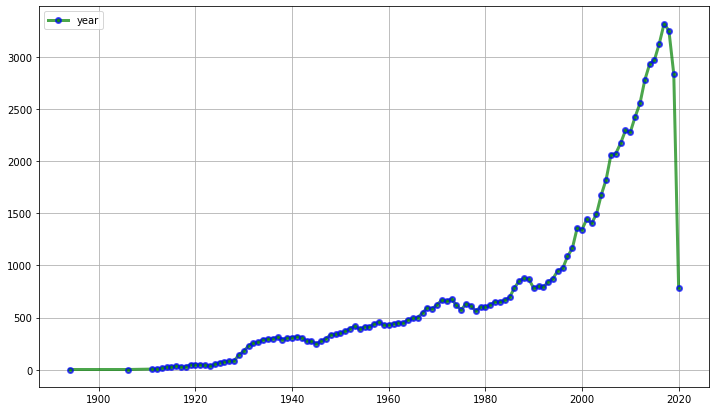

In [16]:
plt.figure(figsize=(12, 7))

plt.plot(year_data['year'], year_data['counts'], '.-g', alpha=0.7, label='year', lw=3, mec='b', mew=2, ms=10)
plt.legend()
plt.grid(True)

Пока можно сделать вывод только о том, что с развитием кинематографа увеличивалось количество снятых фильмов.<br>
2020 год отстает, так как он еще не закончился, а 2019 можно предположить, что отстает из-за пандемии.

#### Жанр (genre)

In [17]:
data['genre'].describe()

count     85768
unique     1254
top       Drama
freq      12535
Name: genre, dtype: object

In [18]:
data['genre'].value_counts()

Drama                          12535
Comedy                          7679
Comedy, Drama                   4037
Drama, Romance                  3455
Comedy, Romance                 2507
                               ...  
Fantasy, Music, Romance            1
Adult, Crime, Horror               1
Adventure, Mystery, Western        1
Romance, Thriller, Crime           1
Crime, Mystery, Comedy             1
Name: genre, Length: 1254, dtype: int64

У одного фильма может быть указано несколько жанров, перечисленных в одну строку. Разобьем эти данные на отдельные признаки по жанрам. Если жанр-признак относится к фильму, в соответствующей ячейке будет стоять 1, иначе 0.

In [19]:
genre_extra = pd.unique(data['genre']).tolist()
print(len(genre_extra))
genres = []
for i in genre_extra:
    gen = i.split(',')
    for g in gen:
        if g.startswith(' '):
            g = g[1:]
        if not g in genres:
            genres.append(g)
print(len(genres))
print(genres)

1254
25
['Romance', 'Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'News']


In [20]:
for genre in genres:
    data.loc[data['genre'].str.contains(genre, regex=False),genre]=1
    data.loc[data[genre].isnull(),genre]=0

In [21]:
data.head(3)

,imdb_title_id,original_title,year,genre,director,avg_vote,votes,Romance,Biography,Crime,...,Thriller,Sport,Animation,Musical,Music,Film-Noir,Adult,Documentary,Reality-TV,News
0,tt0000009,Miss Jerry,1894,Romance,Alexander Black,5.9,154,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Charles Tait,6.1,589,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0001892,Den sorte drøm,1911,Drama,Urban Gad,5.8,188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Получилось 25 уникальных жанров. Посмотрим на количество фильмов в разрезе жанра. Если фильм относится сразу к нескольким жанрам, будем учитывать его во всех релевантных жанрах.

In [22]:
print(genres)
genres_names = genres
genres_count = []
for i in genres:
    genres_count.append(data[(data[i]==1)][i].value_counts()[1])
print(genres_count)
print(len(genres), len(genres_count))

['Romance', 'Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'News']
[14125, 2377, 11065, 47087, 2293, 7578, 3809, 2239, 5220, 9550, 1583, 29337, 3957, 12922, 3601, 11386, 1062, 2120, 2040, 3680, 663, 2, 2, 3, 1]
25 25


In [23]:
genre_data = pd.DataFrame({'genre':genres, 'counts':genres_count})
genre_data

,genre,counts
0,Romance,14125
1,Biography,2377
2,Crime,11065
3,Drama,47087
4,History,2293
5,Adventure,7578
6,Fantasy,3809
7,War,2239
8,Mystery,5220
9,Horror,9550


Получившиеся данные отобразим на круговой диаграмме.<br>
Для лучшей визуализации, соберем жанры с количеством фильмов менее 1000 в одну группу 'other'.

In [24]:
other_counts = genre_data.loc[genre_data['counts'] <= 1000, 'counts'].sum()
index_array_other = genre_data.loc[genre_data['counts'] <= 1000].index
genre_data=genre_data.drop(index_array_other,axis=0)
genre_data=genre_data.reset_index(drop=True)
genre_data.loc[len(genre_data)] = {'genre': 'other', 'counts': other_counts}
genre_data = genre_data.sort_values('counts', ascending=True)
genre_data

,genre,counts
20,other,671
16,Sport,1062
10,Western,1583
18,Musical,2040
17,Animation,2120
7,War,2239
4,History,2293
1,Biography,2377
14,Sci-Fi,3601
19,Music,3680


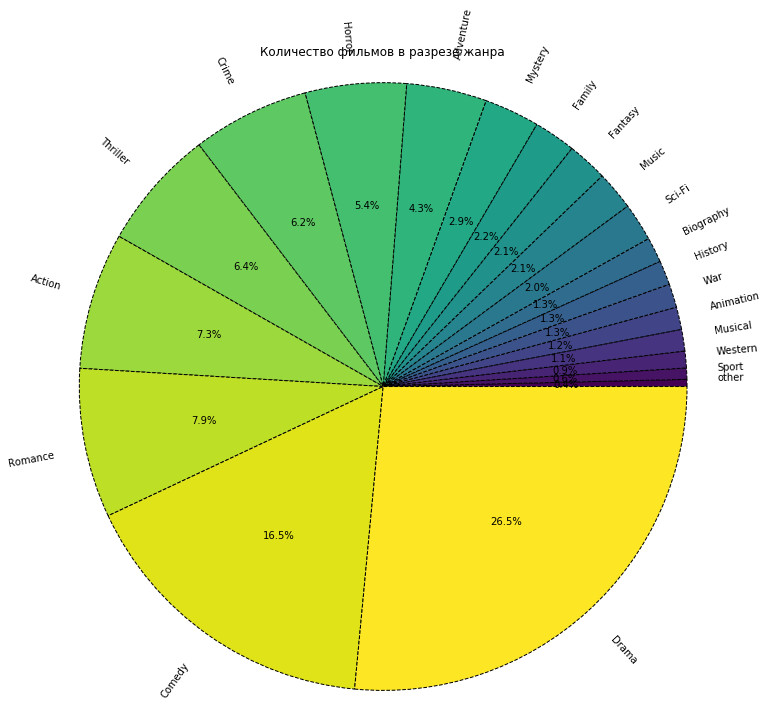

In [25]:
from matplotlib import cm
vals = genre_data['counts']
labels = genre_data['genre']

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
number = len(labels)
cmap = plt.get_cmap('viridis')
cs = [cmap(i) for i in np.linspace(0, 1, number)]
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=False, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels=True,
      colors=cs)
ax.axis('equal')
ax.set_title('Количество фильмов в разрезе жанра')
plt.show()

Самые многочисленные жанры - это драма и комедия.

Посмотрим, как распределились жанры фильмов по годам.

In [26]:
data.head(3).T

,0,1,2
imdb_title_id,tt0000009,tt0000574,tt0001892
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm
year,1894,1906,1911
genre,Romance,"Biography, Crime, Drama",Drama
director,Alexander Black,Charles Tait,Urban Gad
avg_vote,5.9,6.1,5.8
votes,154,589,188
Romance,1,0,0
Biography,0,1,0
Crime,0,1,0


In [27]:
years = year_data['year']
film_counts = pd.Series(data=None)
genres_years_data = pd.DataFrame(data={'genre':[], 'year':[], 'counts':[]})

for year in years:
    curr_data = data.loc[data['year']==year]
    for genre in genres:
        film_counts = curr_data[(curr_data[genre]==1)][genre].value_counts()
        if not film_counts.empty:
            genres_years_data.loc[len(genres_years_data)] = {'genre': genre, 'year': year, 'counts':film_counts[1]}
            film_counts = pd.Series(data=None)
genres_years_data.head(10)

,genre,year,counts
0,Romance,1894.0,1.0
1,Biography,1906.0,1.0
2,Crime,1906.0,1.0
3,Drama,1906.0,1.0
4,Drama,1911.0,3.0
5,History,1911.0,1.0
6,Adventure,1911.0,1.0
7,Fantasy,1911.0,2.0
8,War,1911.0,2.0
9,Biography,1912.0,1.0


In [28]:
sizes = []
for i in genres_years_data['counts']:
    sizes.append(i)

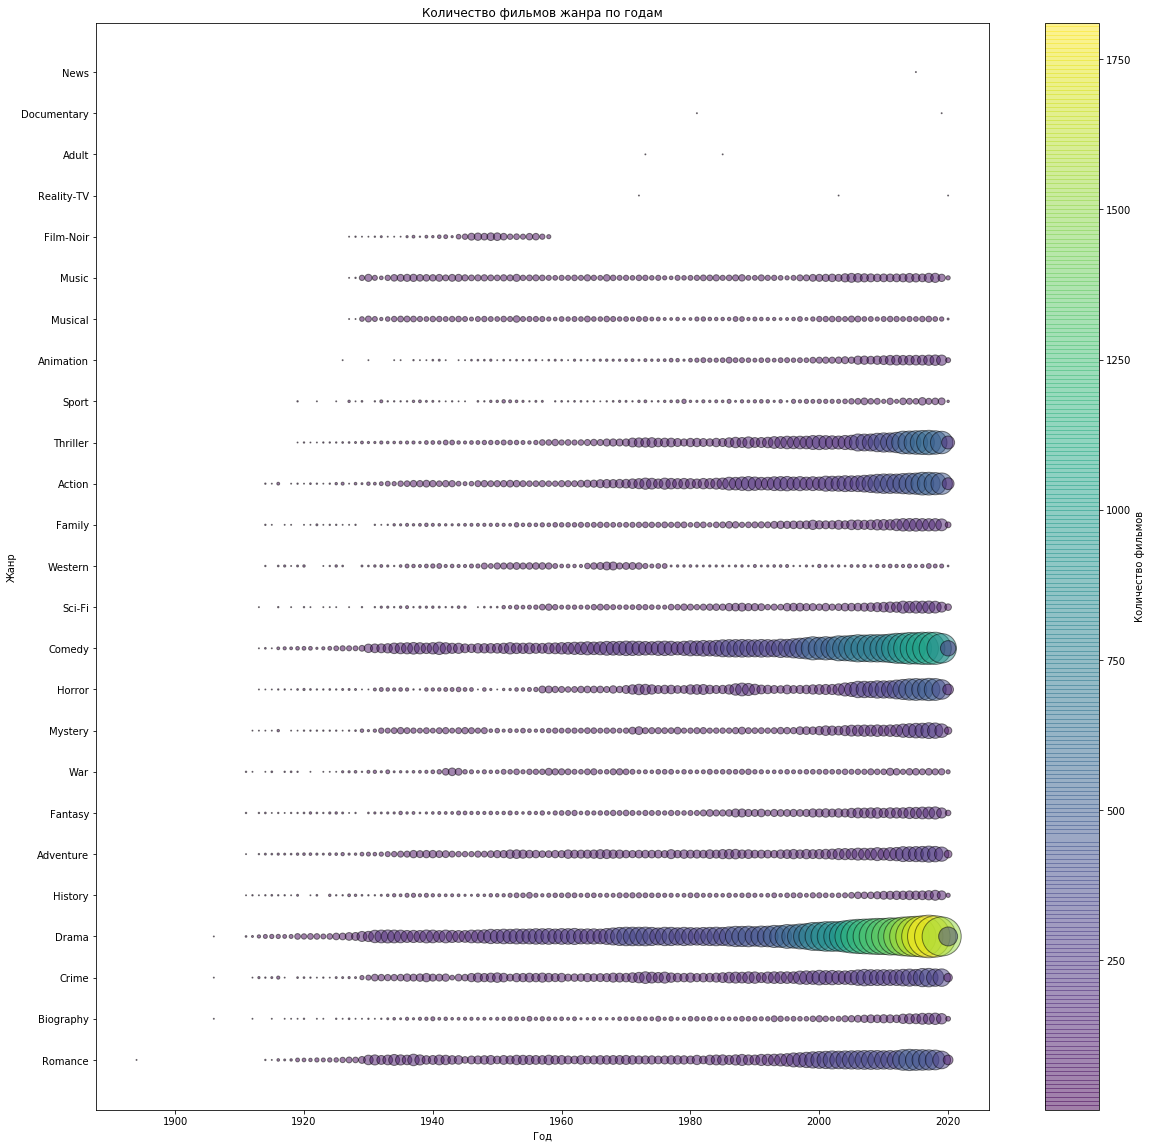

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

ax.set_xlabel('Год')
ax.set_ylabel('Жанр')
ax.set_title('Количество фильмов жанра по годам')

plt.scatter(genres_years_data['year'], genres_years_data['genre'] , c=sizes, 
            cmap = 'viridis', s=sizes, alpha=0.5, edgecolors = 'black')
cbar = plt.colorbar()
cbar.set_label('Количество фильмов')
plt.show()

Размеры кругов отражают количество фильмов, отснятых в этом жанре.<br>
Здесь можно сделать вывод о том, что с течением времени стали снимать больше фильмов в жанрах "Драма", "Романтика", "Комедия", "Триллер", и "Экшн". То есть фильмы стали более ориентированы на эмоциональную реакцию зрителей.

In [30]:
data.head(5).T

,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
year,1894,1906,1911,1912,1911
genre,Romance,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy"
director,Alexander Black,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan"
avg_vote,5.9,6.1,5.8,5.2,7
votes,154,589,188,446,2237
Romance,1,0,0,0,0
Biography,0,1,0,0,0
Crime,0,1,0,0,0


Теперь посмотрим на то, какие жанры получили наиболее высокие оценки за все время.<br>
Для этого по каждому жанру просуммируем средние оценки фильмов и разделим на количество фильмов в этом жанре. В случае, если фильм относится к нескольким жанрам, учитываем его несколько раз в соответствующих жанрах.

Если в выборке у жанра менее 30 фильмов, не будем рассматривать его, так как выборка нерепрезентативна.

In [31]:
genres_votes_data = pd.DataFrame(data={'genre':[], 'sum_votes':[], 'mean_votes':[], 'counts':[]})

In [32]:
film_counts = 0
for genre in genres:
    film_counts = data[(data[genre]==1)][genre].value_counts()[1]
    sum_votes = data[(data[genre]==1)]['avg_vote'].sum()
    mean_votes = 0
    if not film_counts==0:
        mean_votes = sum_votes / film_counts
    genres_votes_data.loc[len(genres_votes_data)] = {'genre': genre, 'sum_votes':sum_votes,'mean_votes': mean_votes, 'counts': film_counts}
    film_counts = 0
    
index_array_small_counts = genres_votes_data.loc[genres_votes_data['counts'] <= 30].index
genres_votes_data=genres_votes_data.drop(index_array_small_counts,axis=0)
genres_votes_data=genres_votes_data.reset_index(drop=True)

genres_votes_data = genres_votes_data.sort_values('mean_votes', ascending=True)
genres_votes_data

,genre,sum_votes,mean_votes,counts
9,Horror,46151.3,4.832597,9550.0
14,Sci-Fi,18256.7,5.069897,3601.0
15,Thriller,62326.3,5.473942,11386.0
13,Action,72684.4,5.624857,12922.0
6,Fantasy,21877.5,5.743633,3809.0
8,Mystery,30396.6,5.823103,5220.0
5,Adventure,44283.6,5.843705,7578.0
11,Comedy,172050.9,5.864639,29337.0
12,Family,23445.8,5.925145,3957.0
10,Western,9463.8,5.978395,1583.0


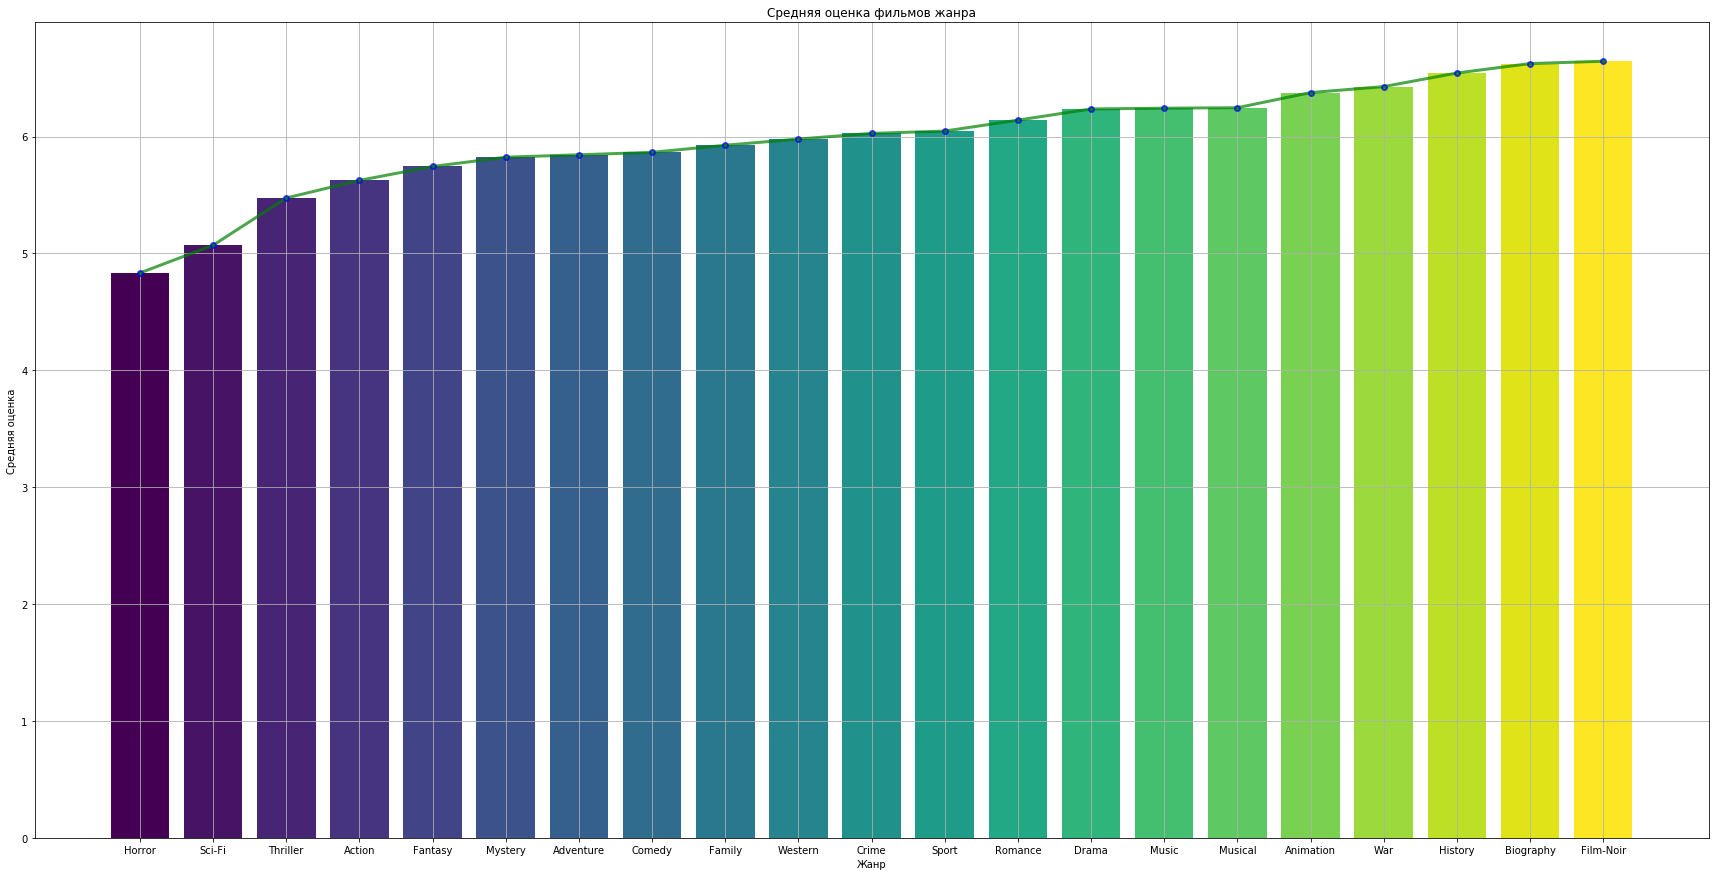

In [33]:
x = genres_votes_data['genre']
y = genres_votes_data['mean_votes']

fig, ax = plt.subplots()

number = len(x)
cmap = plt.get_cmap('viridis')
cs = [cmap(i) for i in np.linspace(0, 1, number)]
ax.bar(x,y,color=cs)

ax.plot(genres_votes_data['genre'], genres_votes_data['mean_votes'], '.-g', alpha=0.7, label='genre', lw=3, mec='b', mew=2, ms=10)
ax.set_xlabel('Жанр')
ax.set_ylabel('Средняя оценка')
fig.set_figwidth(30)    #  ширина и
fig.set_figheight(15)    #  высота "Figure"
plt.title('Средняя оценка фильмов жанра')
plt.grid(True)

plt.show()

Самую высокую среднюю оценку получили фильмы жанра "Нуар", биографические и исторические фильмов.

Посмотрим на то, как распределились плохие и хорошие оценки фильмов по жанрам. Смотрим за весь период времени.<br>
"Положительной" считаем оценку больше либо равную 5, "отрицательной" менее 5.<br>
Жанры с небольшим количеством фильмов также не рассматриваем.

In [34]:
genres_votes_bad_good_data = pd.DataFrame(data={'genre':[], 'sum_p_votes':[], 'mean_p_votes':[], 'p_counts':[],
                                                'sum_n_votes':[], 'mean_n_votes':[], 'n_counts':[]})

In [35]:
film_p_counts = 0
film_n_counts = 0
for genre in genres:
    film_p_counts_s = data[(data[genre]==1) & (data['avg_vote']>=5)][genre].value_counts()
    if not film_p_counts_s.empty:
        film_p_counts = film_p_counts_s[1]
    film_n_counts_s = data[(data[genre]==1) & (data['avg_vote']<5)][genre].value_counts()
    if not film_n_counts_s.empty:
        film_n_counts = film_n_counts_s[1]
    sum_p_votes = data[(data[genre]==1) & (data['avg_vote']>=5)]['avg_vote'].sum()
    sum_n_votes = data[(data[genre]==1) & (data['avg_vote']<5)]['avg_vote'].sum()
    mean_p_votes = 0
    mean_n_votes = 0
    if not film_p_counts==0:
        mean_p_votes = sum_p_votes / film_p_counts
    if not film_n_counts==0:
        mean_n_votes = sum_n_votes / film_n_counts
    genres_votes_bad_good_data.loc[len(genres_votes_bad_good_data)] = {'genre':genre, 'sum_p_votes':sum_p_votes, 
                                                                       'mean_p_votes':mean_p_votes, 'p_counts':film_p_counts,
                                                                       'sum_n_votes':sum_n_votes, 'mean_n_votes':mean_n_votes,
                                                                       'n_counts':film_n_counts}
    film_p_counts = 0
    film_n_counts = 0

index_array_small_counts = genres_votes_bad_good_data.loc[genres_votes_bad_good_data['n_counts'] <= 30].index
genres_votes_bad_good_data=genres_votes_bad_good_data.drop(index_array_small_counts,axis=0)
genres_votes_bad_good_data=genres_votes_bad_good_data.reset_index(drop=True)

genres_votes_bad_good_data.head(25)

,genre,sum_p_votes,mean_p_votes,p_counts,sum_n_votes,mean_n_votes,n_counts
0,Romance,79964.8,6.397696,12499.0,6764.2,4.160025,1626.0
1,Biography,15381.4,6.728521,2286.0,363.9,3.998901,91.0
2,Crime,59558.8,6.388373,9323.0,7126.9,4.091217,1742.0
3,Drama,271833.8,6.501801,41809.0,21795.7,4.129538,5278.0
4,History,14475.9,6.698704,2161.0,527.8,3.998485,132.0
5,Adventure,38112.0,6.364729,5988.0,6171.6,3.881509,1590.0
6,Fantasy,18286.9,6.356239,2877.0,3590.6,3.852575,932.0
7,War,13620.6,6.663699,2044.0,769.6,3.946667,195.0
8,Mystery,25913.4,6.288134,4121.0,4483.2,4.079345,1099.0
9,Horror,27263.0,5.942241,4588.0,18888.3,3.806590,4962.0


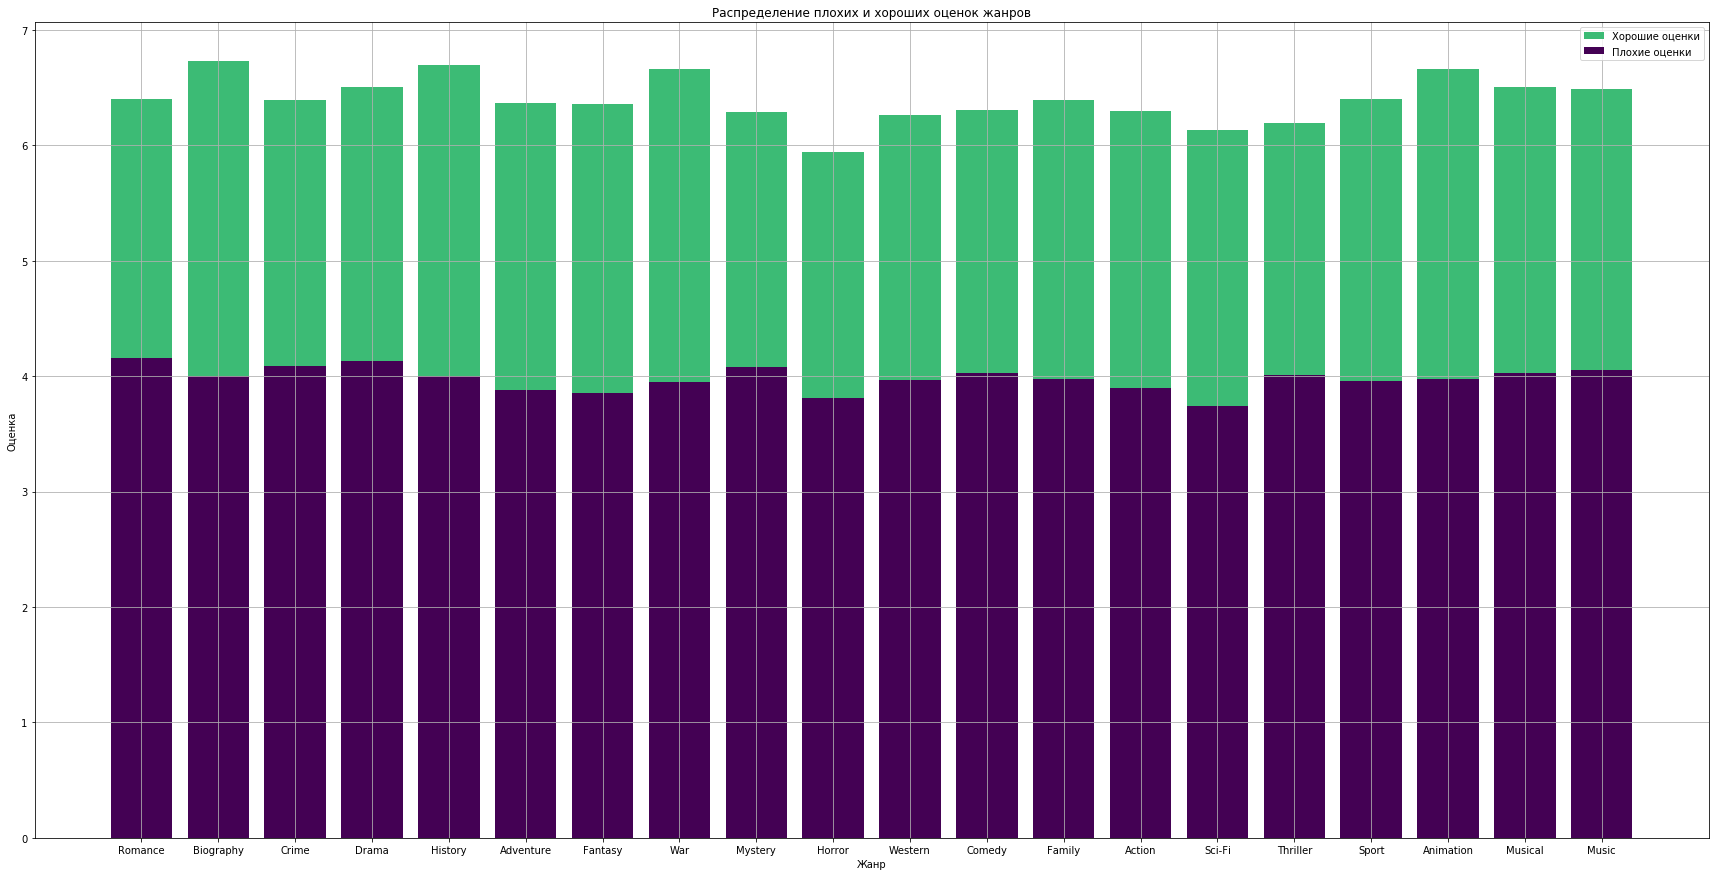

In [36]:
x = genres_votes_bad_good_data['genre']
data_1 = genres_votes_bad_good_data['mean_p_votes']
data_2 = genres_votes_bad_good_data['mean_n_votes']

fig, ax = plt.subplots()

number = len(x)
cmap = plt.get_cmap('viridis')
cs = [cmap(i) for i in np.linspace(0, 1, number)]

ax.bar(x, data_1,color='#3CBB75FF',label='Хорошие оценки')
ax.bar(x, data_2,color='#440154FF',label='Плохие оценки')
ax.set_xlabel('Жанр')
ax.set_ylabel('Оценка')

fig.set_figwidth(30)    #  ширина и
fig.set_figheight(15)    #  высота "Figure"
plt.title('Распределение плохих и хороших оценок жанров')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Тут особых лидеров и аутсайдеров нет. "Хорошая" оценка у всех жанров колеблется около 6, а "плохая" около 4.

Посмотрим на динамику оценок по жанрам и по годам.

In [37]:
film_counts = pd.Series(data=None)
genres_years_data_votes_bad_good = pd.DataFrame(data={'year':[], 'genre':[], 'counts':[], 'mean_votes':[], 'sum_p_votes':[], 
                                                      'mean_p_votes':[], 'p_counts':[],'sum_n_votes':[], 
                                                      'mean_n_votes':[], 'n_counts':[]})
for year in years:
    curr_data = data.loc[data['year']==year]
    for genre in genres:
        counts = 0
        film_p_counts = 0
        film_n_counts = 0
        film_p_counts_s = curr_data[(curr_data[genre]==1) & (curr_data['avg_vote']>=5)][genre].value_counts()
        if not film_p_counts_s.empty:
            film_p_counts = film_p_counts_s[1]
        film_n_counts_s = curr_data[(curr_data[genre]==1) & (curr_data['avg_vote']<5)][genre].value_counts()
        if not film_n_counts_s.empty:
            film_n_counts = film_n_counts_s[1]
        counts = film_p_counts + film_n_counts
        sum_votes = curr_data[(curr_data[genre]==1)]['avg_vote'].sum()
        sum_p_votes = curr_data[(curr_data[genre]==1) & (curr_data['avg_vote']>=5)]['avg_vote'].sum()
        sum_n_votes = curr_data[(curr_data[genre]==1) & (curr_data['avg_vote']<5)]['avg_vote'].sum()
        mean_p_votes = 0
        mean_n_votes = 0
        mean_votes = 0
        if not counts==0:
            mean_votes = sum_votes / counts
        if not film_p_counts==0:
            mean_p_votes = sum_p_votes / film_p_counts
        if not film_n_counts==0:
            mean_n_votes = sum_n_votes / film_n_counts
        genres_years_data_votes_bad_good.loc[len(genres_years_data_votes_bad_good)] = {'year':year, 'genre':genre, 'counts':counts, 'mean_votes':mean_votes,
                                                                                       'sum_p_votes':sum_p_votes, 'mean_p_votes':mean_p_votes, 
                                                                                       'p_counts':film_p_counts,'sum_n_votes':sum_n_votes, 
                                                                                       'mean_n_votes':mean_n_votes,'n_counts':film_n_counts}
    film_p_counts = 0
    film_n_counts = 0
    counts = 0
genres_years_data_votes_bad_good[-10:]

,year,genre,counts,mean_votes,sum_p_votes,mean_p_votes,p_counts,sum_n_votes,mean_n_votes,n_counts
2790,2020.0,Thriller,169.0,5.302959,611.3,6.302062,97.0,284.9,3.956944,72.0
2791,2020.0,Sport,6.0,6.300000,37.8,6.300000,6.0,0.0,0.000000,0.0
2792,2020.0,Animation,25.0,6.204000,144.7,6.577273,22.0,10.4,3.466667,3.0
2793,2020.0,Musical,4.0,5.800000,23.2,5.800000,4.0,0.0,0.000000,0.0
2794,2020.0,Music,18.0,5.822222,94.8,6.320000,15.0,10.0,3.333333,3.0
2795,2020.0,Film-Noir,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2796,2020.0,Adult,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2797,2020.0,Documentary,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2798,2020.0,Reality-TV,1.0,2.100000,0.0,0.000000,0.0,2.1,2.100000,1.0
2799,2020.0,News,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


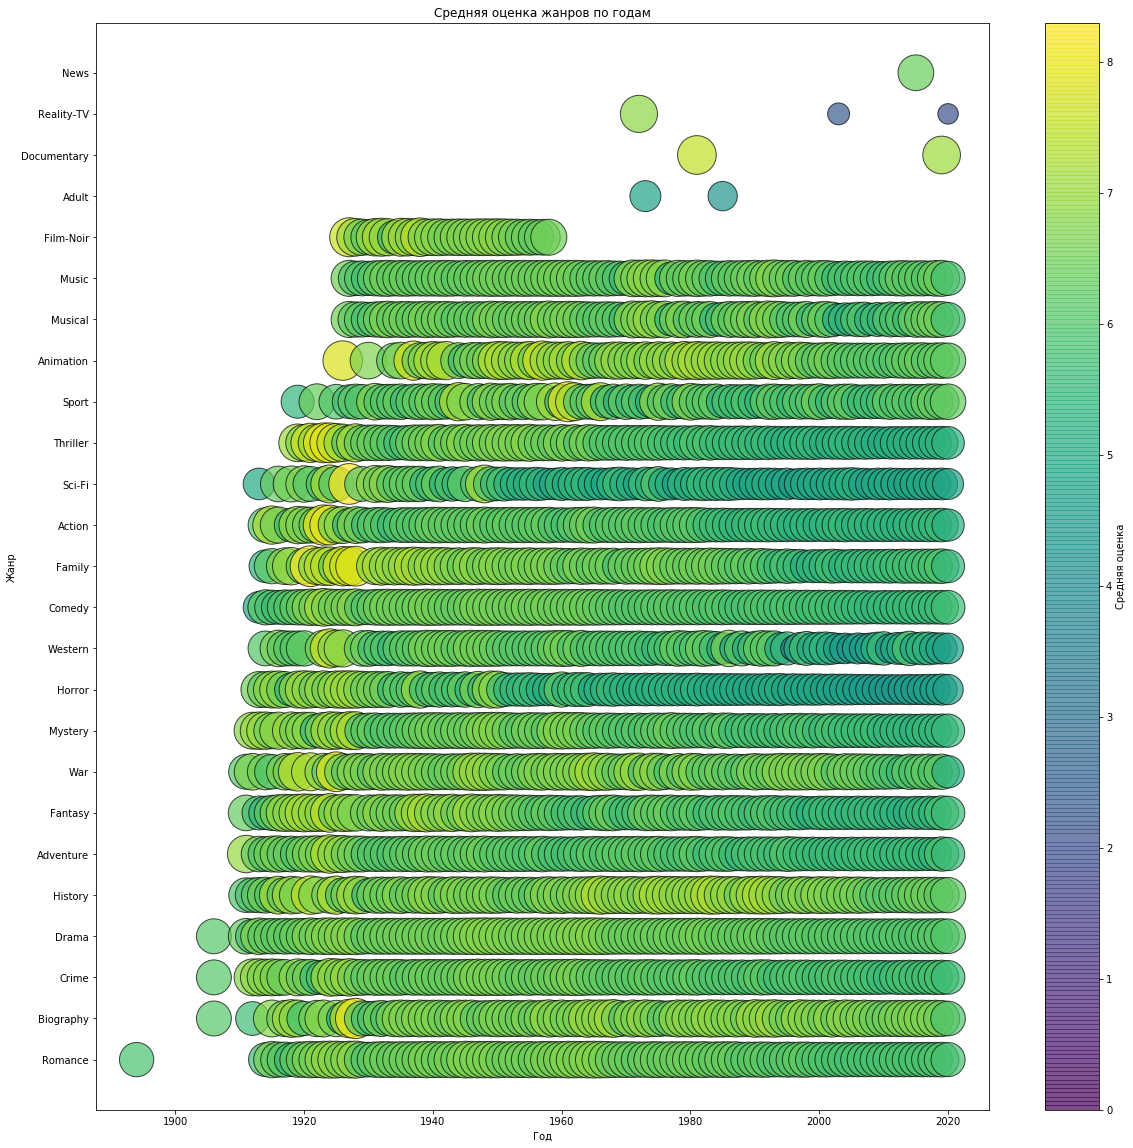

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

ax.set_xlabel('Год')
ax.set_ylabel('Жанр')
ax.set_title('Средняя оценка жанров по годам')

plt.scatter(genres_years_data_votes_bad_good['year'], genres_years_data_votes_bad_good['genre'] , c=genres_years_data_votes_bad_good['mean_votes'], 
            cmap = 'viridis', s=200*genres_years_data_votes_bad_good['mean_votes'], alpha=0.7, edgecolors = 'black')
cbar = plt.colorbar()
cbar.set_label('Средняя оценка')
plt.show()

Не сильно информативный график получился. Тут можно сказать, что в целом все жанры имеют одинаковую популярность у зрителей, и нет каких-то особо выделяющихся.

## Шаг 3: Проверка гипотез.

### Гипотеза 1.

**Проверим гипотезу 1:** "Зрители голосуют в основном либо за очень хорошие фильмы, либо за очень плохие".<br>
То есть, если фильм понравился, - ему с большой вероятностью поставят хорошую оценку. Или если фильм совсем не понравился, - ему поставят плохую оценку. А если впечатления о фильме "никакие", то и оценивать его не будут, просто просмотрят и забудут.<br>

In [39]:
votes_count_votes_data = data[['imdb_title_id','avg_vote','votes']]
votes_count_votes_data.head(10)

,imdb_title_id,avg_vote,votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188
3,tt0002101,5.2,446
4,tt0002130,7.0,2237
5,tt0002199,5.7,484
6,tt0002423,6.8,753
7,tt0002445,6.2,273
8,tt0002452,6.7,198
9,tt0002461,5.5,225


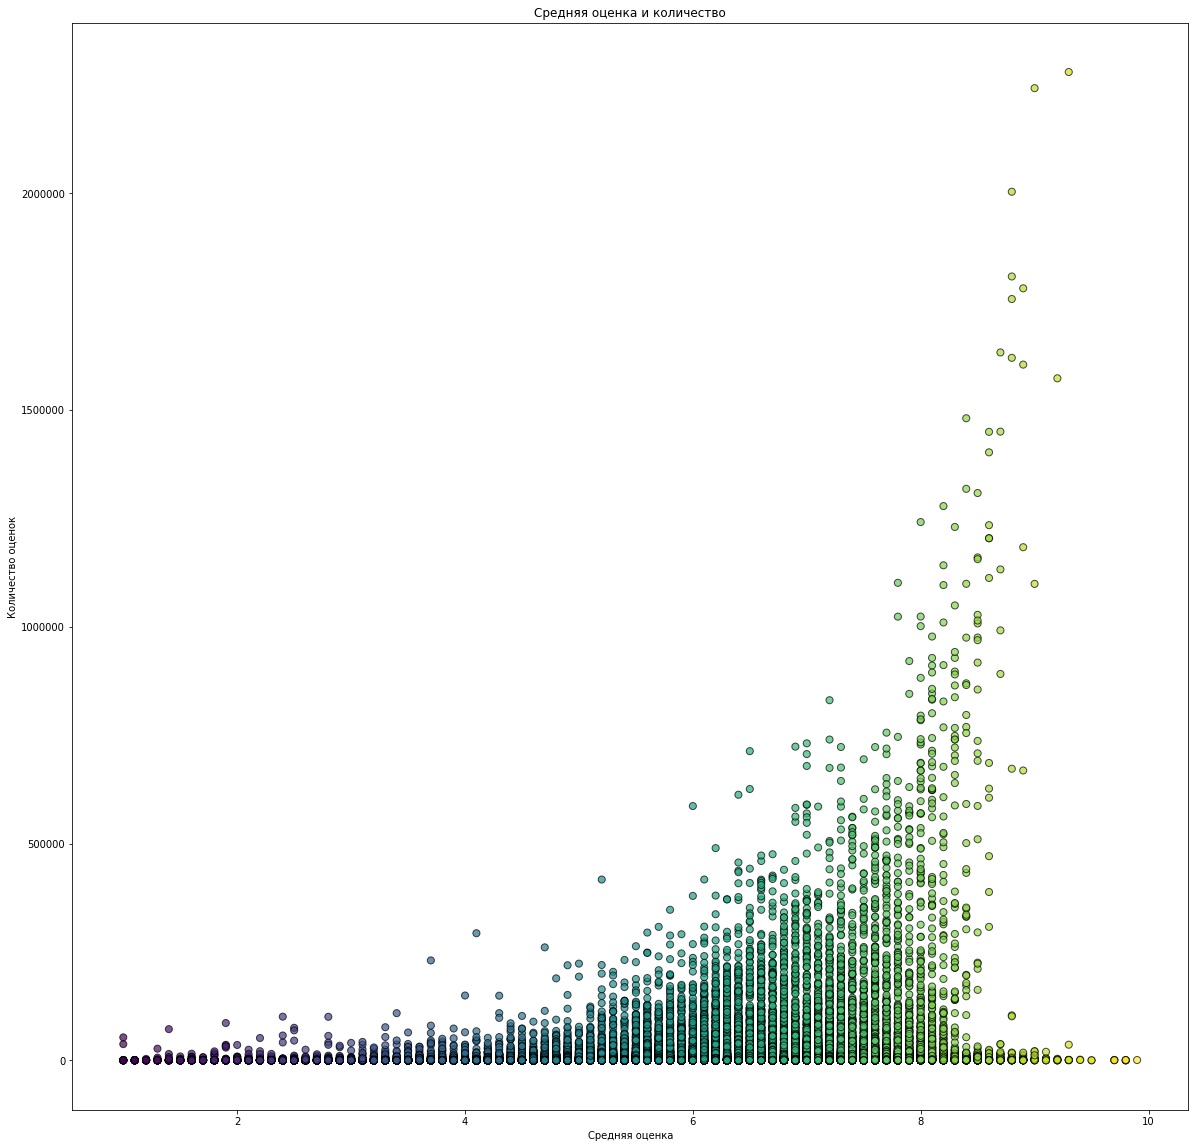

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

ax.set_xlabel('Средняя оценка')
ax.set_ylabel('Количество оценок')
ax.set_title('Средняя оценка и количество')

plt.scatter(votes_count_votes_data['avg_vote'], votes_count_votes_data['votes'] , c=votes_count_votes_data['avg_vote'], 
            cmap = 'viridis', s=50, alpha=0.7, edgecolors = 'black')
plt.show()

В гипотезе 1 предполагалось наличие двух "мод" у графика: одна ближе к левому краю, где низкие оценки, другая ближе к правому, где высокие.<br>
На нашей выборке получилась одна "мода" ближе к средней оценке 8. Следовательно гипотеза не подтвердилась.<br>
Из графика делаем вывод, что голосуют в основном за хоршие фильмы, а, если фильм так себе или не понравился, его и оценивать не будут.

Посмотрим, что это за фильмы, у которых более 1,5 миллионов высоких оценок.

In [41]:
data.loc[data['votes']>1500000]

,imdb_title_id,original_title,year,genre,director,avg_vote,votes,Romance,Biography,Crime,...,Thriller,Sport,Animation,Musical,Music,Film-Noir,Adult,Documentary,Reality-TV,News
15526,tt0068646,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,9.2,1572674,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28060,tt0109830,Forrest Gump,1994,"Drama, Romance",Robert Zemeckis,8.8,1755490,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28375,tt0110912,Pulp Fiction,1994,"Crime, Drama",Quentin Tarantino,8.9,1780147,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28447,tt0111161,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3,2278845,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31273,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",Peter Jackson,8.8,1619920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32223,tt0133093,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski",8.7,1632315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32481,tt0137523,Fight Club,1999,Drama,David Fincher,8.8,1807440,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34121,tt0167260,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",Peter Jackson,8.9,1604280,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48062,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,9.0,2241615,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57445,tt1375666,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,8.8,2002816,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Гипотеза 2.

**Проверим гипотезу 2:** "У хорошего режиссера плохих фильмов не бывает"<br>
Предполагается, что, если у режиссера есть "топовый" фильм, то и все остальные фильмы у него с хорошими оценками.<br>
Смотреть будем на разницу между самой высокой средней оценкой фильма режиссера и самой низкой.

Если у фильма указано несколько режиссеров - берем только первого.

In [42]:
director_data_dirty = data[['imdb_title_id','director','avg_vote']]
director_data_dirty.head()

,imdb_title_id,director,avg_vote
0,tt0000009,Alexander Black,5.9
1,tt0000574,Charles Tait,6.1
2,tt0001892,Urban Gad,5.8
3,tt0002101,Charles L. Gaskill,5.2
4,tt0002130,"Francesco Bertolini, Adolfo Padovan",7.0


In [43]:
director_data_dirty['first_director']=director_data_dirty['director'].str.split(',').str[0]
director_data_dirty.head()

,imdb_title_id,director,avg_vote,first_director
0,tt0000009,Alexander Black,5.9,Alexander Black
1,tt0000574,Charles Tait,6.1,Charles Tait
2,tt0001892,Urban Gad,5.8,Urban Gad
3,tt0002101,Charles L. Gaskill,5.2,Charles L. Gaskill
4,tt0002130,"Francesco Bertolini, Adolfo Padovan",7.0,Francesco Bertolini


In [44]:
directors = sorted(pd.unique(director_data_dirty['first_director']).tolist())
len(directors)

32229

In [45]:
director_data = director_data_dirty[['first_director','avg_vote']].groupby(['first_director']).agg({'avg_vote': ['sum','count','min','max']}).reset_index()
director_data['mark'] = director_data['avg_vote', 'sum'] / director_data['avg_vote', 'count']
director_data['diff'] = director_data['avg_vote', 'max'] - director_data['avg_vote', 'min']
director_data.head()

first_director avg_vote                   mark diff
                                sum count  min  max            
0         'Evil' Ted Smith      4.0     1  4.0  4.0  4.000  0.0
1  'Philthy' Phil Phillips      3.7     1  3.7  3.7  3.700  0.0
2          A. Balakrishnan      7.0     1  7.0  7.0  7.000  0.0
3             A. Bhimsingh     55.4     8  6.6  7.2  6.925  0.6
4             A. Dean Bell      9.3     2  2.8  6.5  4.650  3.7

Режиссеры с самыми высокими оценками.

In [46]:
director_data = director_data.sort_values(by='mark', ascending=False)
director_data.head(5)

first_director avg_vote                 mark diff
                           sum count  min  max          
21236       Msn Surya      9.9     1  9.9  9.9  9.9  0.0
26505   Sampath Rudra      9.8     1  9.8  9.8  9.8  0.0
3025     Basheed S.K.      9.8     1  9.8  9.8  9.8  0.0
177    Abner Official      9.8     1  9.8  9.8  9.8  0.0
49      Aalmist Subba      9.8     1  9.8  9.8  9.8  0.0

Выберем режиссеров, у которых более одного фильма и средняя оценка выше 8.

In [47]:
director_top_data = director_data.loc[(director_data['avg_vote', 'count']>1) & (director_data['mark']>=8)].sort_values(by='mark', ascending=False)
director_top_data.head(5)

first_director avg_vote                  mark diff
                                 sum count  min  max           
18921      Marianne Elliott     17.9     2  8.9  9.0  8.95  0.1
15994  Kadiri Venkata Reddy     17.7     2  8.5  9.2  8.85  0.7
7835        Dusan Kovacevic     17.3     2  8.4  8.9  8.65  0.5
10348          Gippy Grewal     17.2     2  8.4  8.8  8.60  0.4
30334               Upendra     42.9     5  8.0  8.8  8.58  0.8

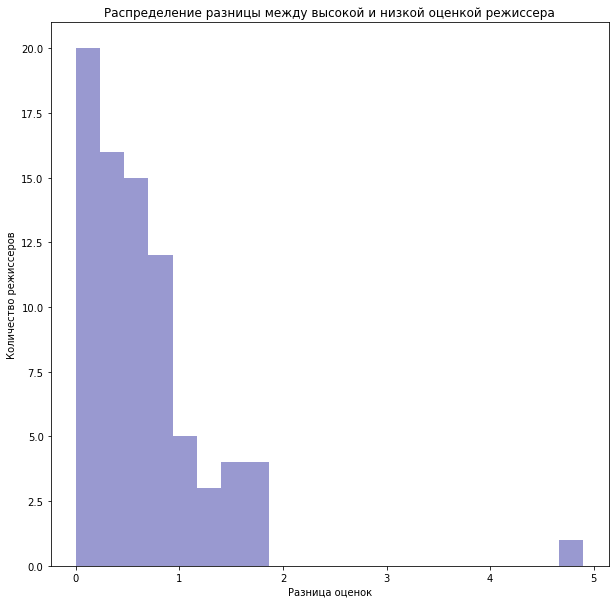

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.distplot(director_top_data[['diff']], hist = True, kde = False, rug = False,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.xlabel('Разница оценок')
plt.ylabel('Количество режиссеров')
plt.title('Распределение разницы между высокой и низкой оценкой режиссера')
plt.show()

In [49]:
director_top_data.shape

(80, 7)

Получили 80 "хороших" режиссеров, у которых средняя оценка выше 8.<br>
Из графика видно, что в целом гипотеза 2 подтверждается: разница между самой высокой оценкой режиссера и самой низкой не превышает 2.<br>
Значит, если фильм режиссера понравился - можно смело смотреть другие фильмы данного режиссера, с большой вероятностью они также понравятся. :)